In [27]:
import pandas as pd
import matplotlib.pyplot as plt

## Задание 1.5.2

In [50]:
df = pd.DataFrame({'man' : [80.2, 80.8, 57.5, 98, 50.5, 73.8, 77.4, 59.7, 77.9, 52.6], 'woman' : [57.9, 57.3, 72.8, 48.2, 59.5, 48.3, 61.2, 53.9, 53.9, 70.7]})

In [3]:
t1 = df['man'].mean()
t2 = df['woman'].mean()
print(f"Средний вес мужчины в данной выборке превышает средний вес женщины на {round(t1-t2,1)}")

Средний вес мужчины в данной выборке превышает средний вес женщины на 12.5


## Задание 1.5.3


In [4]:
df1 = pd.DataFrame({'first' : [2,7,4,3,6,4,1,2]})
df2 = pd.DataFrame({'second' : [5,2,4,8,1,6,7]})

In [5]:
temp = df1.median()[0]
task = "1.5.3"
print(f"Ответ к заданию {task}")
print(f"Медиана в первом наборе данных равна:= {temp}")

Ответ к заданию 1.5.3
Медиана в первом наборе данных равна:= 3.5


In [6]:
temp = df2.median()[0] - df1.median()[0] 
task = "1.5.3"
print(f"Ответ к заданию {task}")
print(f"Это на:= {temp} меньше медианы во втором наборе данных.  ")

Ответ к заданию 1.5.3
Это на:= 1.5 меньше медианы во втором наборе данных.  


## Задание 1.5.4

In [7]:
t1 = df['man'].median()
t2 = df['woman'].median()
temp = t1 
task = "1.5.4"
print(f"Ответ к заданию {task}")
print(f"Медианный вес среди мужчин:= {temp}")
print(f"Медианный вес среди женщин:= {t2}")

Ответ к заданию 1.5.4
Медианный вес среди мужчин:= 75.6
Медианный вес среди женщин:= 57.599999999999994


In [8]:
# Для создания общего списка пациентов объедините серии мужчин и женщин в одинpatients, а затем найдите медиану.
new_df = df.man.append(df.woman, ignore_index=True)

In [9]:
temp = new_df.median() 
task = "1.5.4"
print(f"Ответ к заданию {task}")
print(f"Медианный вес всех пациентов в выборке:= {temp}")

Ответ к заданию 1.5.4
Медианный вес всех пациентов в выборке:= 59.6


In [10]:
temp = t1 
task = "1.5.4"
print(f"Ответ к заданию {task}")
print(f"Медианный вес среди мужчин:= {temp}")

Ответ к заданию 1.5.4
Медианный вес среди мужчин:= 75.6


## Задание 1.7.1  
Возьмём два знакомых нам по задаче 1.5.3 набора данных:
  
Найдите квартили для обоих наборов данных и выберите все верные утверждения из списка ниже:

In [11]:
df1.quantile([.25, .5, .75], axis=0, numeric_only=True, interpolation='midpoint')

,first
0.25,2.0
0.50,3.5
0.75,5.0


In [12]:
df2.quantile([.25, .5, .75], axis=0, numeric_only=True, interpolation='midpoint')

,second
0.25,3.0
0.50,5.0
0.75,6.5


#### !!!внимание!!! вопрос с подвохом  
Из расчетов границ квантилей выше получается, что верным является только ответ номер 3(три): Верхний квартиль во втором наборе данных (==6.5) выше, чем в первом наборе данных (==5).  
Но на самом деле первый ответ тоже верный: Нижний квартиль в первом наборе (==2) совпадает с нижним квартилем во втором наборе (==3).  
Как же так ? Они же не совпадают.  
Всё дело в том, что если кол-во элементов в наборе нечетное, то существует три способа расчета границ первого квартиля (Q~1~).  

Первый способ ручной (приведу его для примера на втором наборе: (1, 2, 4, 5, 6, 7, 8)). Медиана равна 5. Разделяем наш массив по медиане и получаем два набора (1,2,4,5) и (5,6,7,8). Дальше по определению курса - Нижний квартиль Q~1~ отделяет 25 % наблюдений с наименьшими значениями от остальных 75 %. Это означает нам нужно найти медиану в первом наборе. (2+4)/2=3. Этот метод называется инклюзивном. Его использует python.

Второй способ называется эксклюзивный. В нем медиану не берем в расчет и получаем два набора (1,2,4) и (6,7,8). Соответственно медиана равна = 2. И в этом случае нижние границы совпадают (2==2). Не понятно почему авторы выбрали этот вариант, но как есть.

Третий способ. Эмпирическая функции распределения или Интегральная функция распределения(английская аббревиатура CDF). В случае нечетного числа значений в наборе данных, следует включить или исключить медиану, ориентируясь на то, чтобы оставшиеся половинки содержали нечетное число элементов. Например, если в выборке 7 (3+1+3) элементов как у нас, тогда медиану следует исключить, а если бы в ней было 9 (4+1+4) элементов – тогда включить.

## Задание 1.7.2  
Найдите Q1 и Q3 для мужчин и женщин, используя Python (выпишите результат, округляя до 1 знака после точки-разделителя):

In [13]:
temp1 = df.man.quantile([.25, .75], interpolation='midpoint')
temp2 = df.woman.quantile([.25, .75], interpolation='midpoint')
task = "1.7.2"
print(f"Ответ к заданию {task}")
print(f"Для мужчин. Нижняя граница первого квантиля:= {round(temp1[.25],1)}")
print(f"Для мужчин. Верхняя граница третьего квантиля:= {round(temp1[.75],1)}")
print(f"Для женщин. Нижняя граница первого квантиля:= {round(temp2[.25],1)}")
print(f"Для женщин. Верхняя граница третьего квантиля:= {round(temp2[.75],1)}")
print(f"25 % мужчин весят больше, чем := {round(temp1[.75],1)} кг")

Ответ к заданию 1.7.2
Для мужчин. Нижняя граница первого квантиля:= 58.6
Для мужчин. Верхняя граница третьего квантиля:= 79.0
Для женщин. Нижняя граница первого квантиля:= 53.9
Для женщин. Верхняя граница третьего квантиля:= 60.4
25 % мужчин весят больше, чем := 79.0 кг


## Задание 1.9.1  
Найдите размах и межквартильный размах для веса на выборке пациентов клиники

In [18]:
temp1 = df.man.quantile([.25], interpolation='midpoint')[.25]
temp2 = df.man.quantile([.75], interpolation='midpoint')[.75]

temp3 = df.woman.quantile([.25], interpolation='midpoint')[.25]
temp4 = df.woman.quantile([.75], interpolation='midpoint')[.75]

temp5 = df.man.min()
temp6 = df.man.max()

temp7 = df.woman.min()
temp8 = df.woman.max()

task = "1.9.1"
print(f"Ответ к заданию {task}")
print(f"Для мужчин. размах:= {round(temp6-temp5,1)}")
print(f"Для мужчин. межквартильный размах:= {round(temp2-temp1,1)}")
print(f"Для женщин. размах:= {round(temp8-temp7,1)}")
print(f"Для женщин. межквартильный размах:= {round(temp4-temp3,1)}")


Ответ к заданию 1.9.1
Для мужчин. размах:= 47.5
Для мужчин. межквартильный размах:= 20.5
Для женщин. размах:= 24.6
Для женщин. межквартильный размах:= 6.5


### Задание 1.9.2  
Найдите дисперсию и стандартное отклонение веса для выборки пациентов клиники. Выпишите результат, округляя до 1 знака после точки-разделителя

In [19]:
temp1 = df.man.std()
temp2 = df.man.var()

temp3 = df.woman.std()
temp4 = df.woman.var()


task = "1.9.2"
print(f"Ответ к заданию {task}")
print(f"Для мужчин. Стандартное отклонение:= {round(temp1,1)}")
print(f"Для мужчин. Дисперсия:= {round(temp2,1)}")
print(f"Для женщин. Стандартное отклонение:= {round(temp3,1)}")
print(f"Для женщин. Дисперсия:= {round(temp4,1)}")

Ответ к заданию 1.9.2
Для мужчин. Стандартное отклонение:= 15.2
Для мужчин. Дисперсия:= 230.5
Для женщин. Стандартное отклонение:= 8.3
Для женщин. Дисперсия:= 68.4


## Задание 1.11.1
Проверьте наличие выбросов в выборке пациентов клиники

In [48]:
def statisticalOutlierTest(d_df, d_bins, lim_left, lim_right):
    IQR = d_df.quantile(0.75) - d_df.quantile(0.25)
    perc25 = d_df.quantile(0.25)
    perc75 = d_df.quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), 
          '75-й перцентиль: {},'.format(perc75), 
          "IQR: {}, ".format(IQR),
          "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    d_df.loc[d_df.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = d_bins, 
                                                                    range = (lim_left, lim_right),
                                                                    label = 'IQR')
    d_df.loc[d_df <= 100].hist(alpha = 0.5, 
                               bins = d_bins, 
                               range = (lim_left, lim_right), 
                               label = 'выбросы')
    plt.legend();

25-й перцентиль: 58.05, 75-й перцентиль: 79.625, IQR: 21.575000000000003,  Границы выбросов: [25.687499999999993, 111.98750000000001].


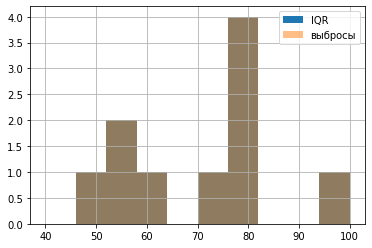

In [51]:
statisticalOutlierTest(df.man,10,40,100)

25-й перцентиль: 53.9, 75-й перцентиль: 60.775000000000006, IQR: 6.875000000000007,  Границы выбросов: [43.58749999999999, 71.08750000000002].


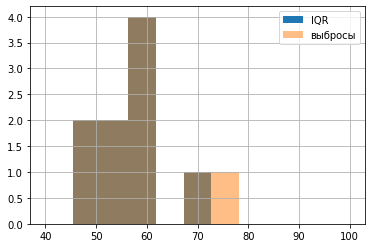

In [52]:
statisticalOutlierTest(df.woman,11,40,100)

## Задание 1.11.2  
Таблица показывает среднюю температуру в январе (в градусах по Цельсию) в одном российском городе за 2007-2018 годы:

Используя Python, найдите описательные статистики средней январской температуры за 12 лет. Ответы округлите до 1 знака после точки-разделителя.

In [42]:
temp_df = pd.DataFrame({
    'year': [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
    'temp': [-4.7, -6.1, -5.5, -3.3, -7.1, -3.1, -5.2, -7.3, -12.1, -6.6, -5.9, -6.3]
})

In [59]:
describe = temp_df.describe()
describe

,year,temp
count,12.000000,12.000000
mean,2012.500000,-6.100000
std,3.605551,2.310844
min,2007.000000,-12.100000
25%,2009.750000,-6.725000
50%,2012.500000,-6.000000
75%,2015.250000,-5.075000
max,2018.000000,-3.100000


In [62]:
temp = describe.temp
quan = temp_df.temp.quantile([.25, .75], interpolation='midpoint')
# обратите внимание для межквартильного размаха мы не берем стандартный расчет квартилей,
# а используем .quantile([.25, .75], interpolation='midpoint')

task = "1.9.2"
print(f"Ответ к заданию {task}")
print(f"Среднее:= {round(temp['mean'],1)}")
print(f"Медиана:= {round(temp['50%'],1)}")
print(f"Стандартное отклонение:= {round(temp['std'],1)}")
print(f"Размах:= {round(temp['max']-temp['min'],1)}")
print(f"Межквартильный размах:= {round(quan[.75]-quan[.25],1)}")

Ответ к заданию 1.9.2
Среднее:= -6.1
Медиана:= -6.0
Стандартное отклонение:= 2.3
Размах:= 9.0
Межквартильный размах:= 1.9


25-й перцентиль: -6.725, 75-й перцентиль: -5.075, IQR: 1.6499999999999995,  Границы выбросов: [-9.2, -2.600000000000001].


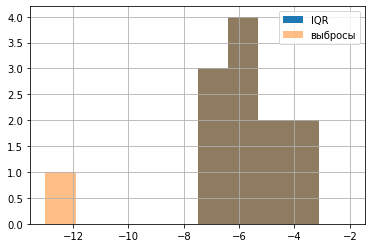

In [53]:
statisticalOutlierTest(temp_df.temp,10,-13,-2)

## Задание 1.14.1  
В Python постройте boxplot на предложенном в предыдущей задаче наборе данных:  
Найдите на графике отображение медианы. Чему она равна?  
Используйте data.median(axis=0) для нахождения численного значения медианы.

In [63]:
data = pd.DataFrame({'value': [48, 44, 42.5, 40.5, 40.5, 39, 39, 38, 38, 38, 35, 33, 30.2, 30, 26, 19.3, 27, 21]})

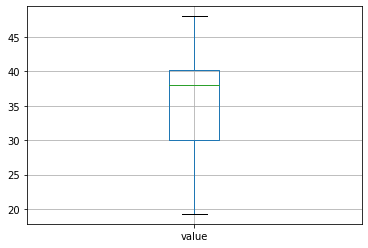

In [66]:
data.boxplot()

In [64]:
data.median()

value    38.0
dtype: float64

## Задание 1.14.2  
В таблице ниже приведены данные о двух группах пользователей определенного сервиса–помощника в администрировании.   
Данные соответствуют общему количество времени, которое пользователи провели онлайн, используя соответствующее приложение (в часах за месяц).

In [67]:
df_groups = pd.DataFrame({
    'group_a': [72, 66, 63.75, 60.75, 60.75, 58.5, 58.5, 57, 57, 57, 52.5, 49.5, 45.3, 45, 39, 28.95, 40.5, 31.5, 49],
    'group_b': [71, 72, 60, 50, 57, 77, 81, 58, 62, 61, 73, 74, 76, 65, 66, 67, 67, 67, 69]
})

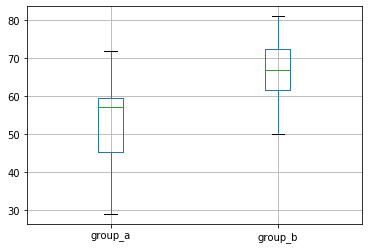

In [68]:
df_groups.boxplot(column=['group_a', 'group_b'])

Конец модуля